# Figure 2: Extending Zhang et al. (2005) with a seasonal cycle

(c) 2023 under a MIT License (https://mit-license.org)

Author: Lukas Brunner (l.brunner@univie.ac.at)

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from core.synthetic_timeseries_functions import get_data_threshold_exceedances
from core.lineplot import lineplot, barplot_daily
from core.io_functions import PLOT_PATH, DATA_PATH

mpl.rc('font', **{'size': 14})

In [2]:
def load_bias(sc, window, in_sample=True, method='linear'):
    fn = 'synthetic_percentiles_bootstrap_sc{sc}_w{window}_{test}{method}.nc'.format(
        sc=sc, window=window, test='' if in_sample else 'test_', method=method)
    freq = xr.open_dataset(os.path.join(DATA_PATH, 'synthetic', fn))['frequency_bootstrap'].squeeze() * 100
    perc = freq['percentile']
    bias = (freq - (100 - perc)) / (100 - perc) * 100
    return perc, bias

In [3]:
cmap = plt.cm.get_cmap('RdBu_r', 20)
red = list(cmap(np.arange(20)))[-3]
blue = list(cmap(np.arange(20)))[3]

colors = sns.color_palette("colorblind")
lightorange = colors[1]
green = colors[2]
purple = colors[4]


## Figure 2a,b

In [6]:
def plot_zhang(method='linear'):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    colors =  plt.cm.tab20(np.arange(20))

    # --- in-base and out-of-base separately ---
    ax = axes[0]
    ax.plot(*load_bias(0., 5, False, method=method), color=green, ls='--')
    h1, = ax.plot(*load_bias(0., 31, False, method=method), color=green, label='Out-of-base')

    ax.plot(*load_bias(0., 5, method=method), color=lightorange, ls='--')
    h2, = ax.plot(*load_bias(0., 31, method=method), color=lightorange, label='In-base')

    # legend for in-base and out-of-base
    leg = ax.legend(handles=[h1, h2], loc='upper left', fontsize='small', title_fontsize='small')

    ax.set_title('(a) Frequency bias (%)')
    ax.set_ylim(-40, 40)
    if method == 'linear':
        ax.set_ylim(-5, 85)

    # --- in-base/out-of-base jump ---
    ax = axes[1]
    jump5 = load_bias(0., 5, False, method=method)[1] - load_bias(0., 5, method=method)[1]
    jump31 = load_bias(0., 31, False, method=method)[1] - load_bias(0., 31, method=method)[1]

    ax.plot(load_bias(0., 5, method=method)[0], jump5, color=purple, ls='--')
    ax.plot(load_bias(0., 31, method=method)[0], jump31, color=purple)
    
        
        
    ax.set_title('(b) Out-of-base minus in-base (%)')
    ax.set_ylim(0, 40)
    
    # legend for window length
    h3, = ax.plot([], color='gray', ls='--', label='5 day window')
    h4, = ax.plot([], color='gray', ls='-', label='31 day window')
    leg = ax.legend(handles=[h3, h4], loc='upper left', title='Window size', fontsize='small', title_fontsize='small')
    leg._legend_box.align = "left"


    # --- running window bias ---
    ax = axes[2]

    label = ['Without', 'Moderate', 'Strong']
    colors = [lightorange, blue, red]
    for idx, sc in enumerate([0., 1.8, 3.]):

        # if sc == 0:  # don't show case without?
        #     continue 

        ax.plot(*load_bias(sc, 5, method=method), color=colors[idx], ls='--')
        ax.plot(*load_bias(sc, 31, method=method), color=colors[idx], label=label[idx])

    ax.set_title('(c) In-base frequency bias (%)')
    ax.axhline(0, color='k', ls=':', zorder=-99)
    
    ax.set_ylim(-40, 0)
    loc = 'lower left'
    if method == 'linear':
        ax.set_ylim(-40, 40)
        loc = 'upper left'

    leg = ax.legend(loc=loc, title='Seasonal cycle', fontsize='small', title_fontsize='small')
    leg._legend_box.align = "left"

    # --- settings for all axes ---
    for ax in axes.ravel():
        ax.set_xlim(80, 99)  
        ax.set_xticks([80, 85, 90, 95, 99])
        ax.set_xlabel('Percentile')
        # ax.axvline(98, color='lightgray', zorder=-1)
        ax.grid()


    # --- main title ---    
    fig.suptitle(' '.join([
        ' ' *25,
        'Without seasonal cycle',
        ' ' *55,
        'With seasonal cycle'])
        , y=.95, fontsize='large', fontweight='bold')

    fig.tight_layout()
    
    return fig, ax

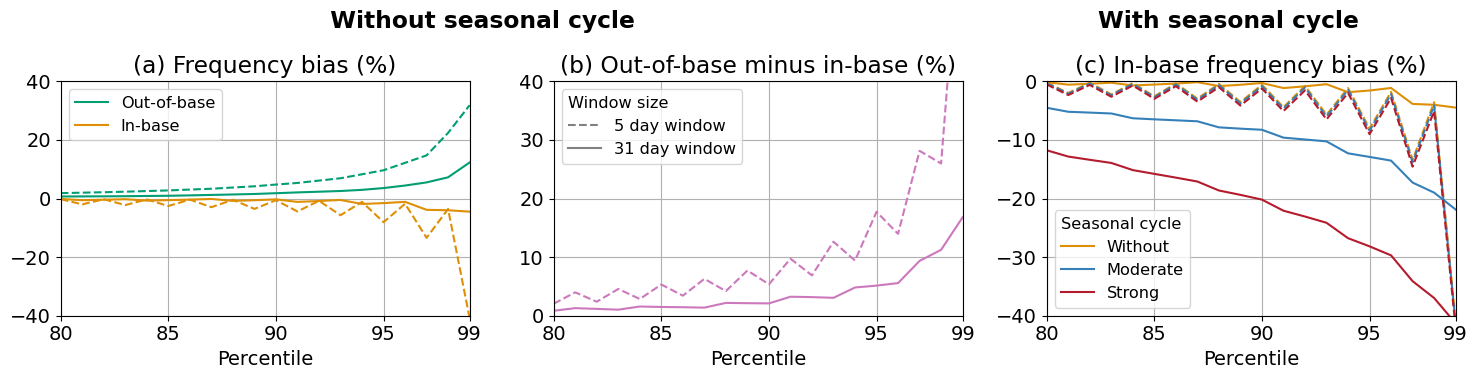

In [7]:
fig, ax = plot_zhang('weibull')

# fig.savefig(os.path.join(PLOT_PATH, 'figure2.png'))
fig.savefig(os.path.join(PLOT_PATH, 'figure2.pdf'))